<a href="https://colab.research.google.com/github/andrespineda/UC-Berkeley-MLAI/blob/main/Assignment_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# Primary Objective

The primary objective is to uncover patterns, correlations, and insights that can inform the pricing strategy of a used car dealership by pinpointing the attributes that consumers value most in used cars. Specifically, the data task will involve:
Data Cleaning and Preprocessing: This step will involve handling missing values, outliers, and erroneous data entries to ensure the dataset's quality and reliability for analysis.

## Exploratory Data Analysis (EDA):
 Conducting an in-depth exploration of the dataset to understand the distribution of key variables, identify potential relationships between car features and their prices, and detect any trends or patterns.
## Feature Engineering:
Creating new variables from existing ones to better capture the aspects that might influence a car's price, such as car age, brand prestige, or a composite index of vehicle condition.
+ Convert States into three geographic areas (West, Central, East)
## Model Building and Evaluation:
 Developing predictive models using regression analysis or machine learning algorithms to quantify the impact of various car attributes on their selling price. This step will also involve evaluating model performance using appropriate metrics such as R-squared, RMSE (Root Mean Square Error), or MAE (Mean Absolute Error) to ensure the model's predictive accuracy and reliability.
## Insight Generation and Recommendations:
 Interpreting the model results to extract actionable insights regarding which features contribute most significantly to a used car's price. This will form the basis for data-driven recommendations to the used car dealership on which car attributes to prioritize in their inventory based on consumer preferences and market demand.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

# Data Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load the dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/UC Berkeley/data/vehicles.csv")

# Display the first few rows of the dataset
print(df.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [4]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

Rename some columns for brevity

In [207]:
#  Drop any rows where 'type' is ( integer or float) and has NaN values

df = df.drop(df.loc[(df['type'].notnull()) & (df['type'].apply(lambda x: isinstance(x, (int, float))) & (df['type'].isnull()))].index)


In [206]:
# Drop values in 'VIN' where they are NaN

df = df.dropna(subset=['VIN'])

# Drop rows where 'VIN' value is duplicated

df = df.drop_duplicates(subset='VIN', keep='last')

# Make 'VIN' the index column

df = df.set_index('VIN')

In [208]:
# Drop columns in ['id', 'region']

df = df.drop(columns=['id', 'region'])


In [209]:
# Cluster states into three areas

west = ['ak', 'az', 'ca', 'co', 'hi', 'id', 'mt', 'nv', 'nm', 'or', 'ut', 'wa', 'wy']
central = ['al', 'ar', 'il', 'ia', 'ks', 'ky', 'la', 'mn', 'ms', 'mo', 'ne', 'nd', 'ok', 'sd', 'tx', 'wi']
east = ['ct', 'de', 'fl', 'ga', 'in', 'me', 'md', 'ma', 'mi', 'nh', 'nj', 'ny', 'nc', 'oh', 'pa', 'ri', 'sc', 'tn', 'vt', 'va', 'wv', 'dc']


def map_state_to_area(state):
    if state in west:
        return 'West'
    elif state in central:
        return 'Central'
    elif state in east:
        return 'East'
    else:
        return 'Other'  # For states not categorized or missing values

df['Area'] = df['state'].apply(map_state_to_area)

df['Area'].value_counts()

# Now drop 'state' column

df = df.drop('state', axis=1)



# Clean up 'Model' Column

In [210]:

# Delete values in 'model' where value_counts < 50

df = df[~df['model'].isin(df['model'].value_counts()[df['model'].value_counts() < 50].index)]
df['model'].value_counts()

# Drop values in 'model' where they are NaN

df = df.dropna(subset=['model'])

# Clean up 'model' values that have odd text values

df['model'] = df['model'].astype(str).apply(lambda x : x.split(' ')[0])
df['model'] = df['model'].astype(str).apply(lambda x: x.split('/')[0])

df = df[~df['model'].isin(df['model'].value_counts()[df['model'].value_counts() < 50].index)]

# Display unique values in 'model'

print(df["model"].unique())


['mustang' 'sentra' 'fj' 'altima' 'frontier' 'tacoma' 'enclave'
 'silverado' 'sorento' 'pathfinder' '2500' 'terrain' 'charger' 'forte'
 '300' 'cooper' '4runner' 'cobalt' 'tahoe' 'q7' 'trax' 'hhr' 'camry' 'q50'
 'venza' 'rogue' 'elantra' 'jetta' 'explorer' 'srx' 'corolla' 'rx'
 'accent' 'e-class' 'cx-5' 'verano' 'accord' 'impala' 'grand' 'yukon'
 'murano' '3500' 'odyssey' 'optima' 'rio' 'f-150' 'x3' 'is' 'malibu'
 '1500' 'mdx' 'wrangler' 'lancer' 'f150' 'focus' 'liberty' 'es' 'cherokee'
 'escape' 'cruze' 'cr-v' 'titan' 'prius' 'trailblazer' 'fusion'
 'outlander' 'highlander' 'tl' 'juke' 'avalon' 'compass' 'edge' 'soul'
 'acadia' 'sonic' 'journey' 'traverse' 'santa' 's60' 'fiesta' 'versa'
 'lacrosse' 'rdx' 'sedona' 'pilot' 'maxima' 'durango' 'veloster' 'sonata'
 'patriot' 'tlx' 'sportage' 'xv' 'passat' 'civic' 'c-class' 'xterra'
 'taurus' 'x5' 'yaris' 'armada' 'suburban' 'tundra' 'sierra' 'escalade'
 'mkc' 'renegade' 'town' 'colorado' 'lucerne' 'rav4' 'sienna' '3' 'pt'
 'outback' 'expres

In [262]:
# Drop values in 'year' where they are NaN

df = df.dropna(subset=['year'])

# Convert 'year' to integer
df['year'] = df['year'].fillna(0)
df['year'] = df['year'].astype('int64')

# Drop where year < 2000
df = df.drop(df.loc[df['year'] < 2000].index)

# Drop values in 'price' where they are NaN

df = df.dropna(subset=['price'])

# Drop where 'price' < 1,000 or 'price' > 80,000

df = df.drop(df.loc[df['price'] < 1000].index)
df = df.drop(df.loc[df['price'] > 80000].index)

# Drop values in odometer where they are NaN

df = df.dropna(subset=['odometer'])

# Convert 'odometer' to int64

df = df.dropna(subset=['odometer'])
df['odometer'] = df['odometer'].astype('int64')

#  Drop where 'odometer' > 200000

df = df.drop(df.loc[df['odometer'] > 200000].index)


df = df[~df['fuel'].isin(df['fuel'].value_counts()[df['fuel'].value_counts() < 100].index)]

print(df['fuel'].value_counts())


fuel
gas       4008
diesel     199
hybrid     104
Name: count, dtype: int64


Drop Outliers

In [212]:
# Drop values in 'cylinders' where they are NaN

df = df.dropna(subset=['cylinders'])

# Drop where values in 'cylinders' in ['other', '3 cylinders', '12 cylinders', '5 cylinders', '10 cylinders']]

df = df[~df["cylinders"].isin(['other', '3 cylinders', '5 cylinders', '10 cylinders', '12 cylinders'])]


In [238]:
# Rename 'title_status' to 'title' for brevity
df.rename(columns={'title_status': 'title'}, inplace=True)

# Drop values in 'title' where they are NaN

df = df.dropna(subset=['title'])

# Drop where 'title' in [ rebuilt, salvage, lien, missing, parts only]

df = df.drop(df.loc[df['title'].isin(['rebuilt','salvage', 'lien', 'missing', 'parts only'])].index)

# Drop the title column because we are only interested in cars with good titles

df = df.drop('title', axis=1)


In [214]:
# Drop values in 'condition' where they are NaN

df = df.dropna(subset=['condition'])

# Drop where 'condition' == salvage

df = df.drop(df.loc[df['condition'] == 'salvage'].index)


In [239]:
# Drop values in transmission where they are NaN

df = df.dropna(subset=['transmission'])

# Drop where transmission = other

df = df.drop(df.loc[df['transmission'] == 'other'].index)


In [240]:
# Drop values in drive where they are NaN

df = df.dropna(subset=['drive'])

# Change values in 'drive' from '4wd' to 'fwd'

df['drive'] = df['drive'].replace('4wd', 'fwd')


In [241]:
# Drop values in type where they are NaN

df = df.dropna(subset=['type'])

# Drop 'type' values = bus

df = df.drop(df.loc[df['type'] == 'bus'].index)

# Reduce the number of types

df['type'] = df['type'].replace(['mini-van', 'van', 'offroad', 'wagon', 'convertible'], 'other')
print(df['type'].value_counts())




type
truck        1216
sedan        1155
SUV          1060
pickup        577
other         148
hatchback      85
coupe          75
Name: count, dtype: int64


In [244]:
# Rename paint_color to color for brevity

df.rename(columns={'paint_color': 'color'}, inplace=True)

# Drop values in paint where they are NaN

df = df.dropna(subset=['color'])

# In 'paint' column, change values green, brown, yellow, orange, purple into 'other'

df['color'] = df['color'].replace(['green', 'brown', 'yellow', 'orange', 'purple'], 'other')
# prompt: Change color values that are == 'custom' to 'other'

df['color'] = df['color'].replace('custom', 'other')

print(df['color'].value_counts())

color
white     983
black     767
silver    672
grey      617
blue      477
red       419
other     381
Name: count, dtype: int64


In [245]:
# Drop values in 'size' where they are NaN

df = df.dropna(subset=['size'])

print(df['size'].value_counts())


size
full-size      2624
mid-size       1204
compact         446
sub-compact      42
Name: count, dtype: int64


In [246]:
# Drop values in manufacturer where they are NaN

df = df.dropna(subset=['manufacturer'])

# Drop rows from 'manufacturer' where the value_count() < 100

df = df[~df['manufacturer'].isin(df['manufacturer'].value_counts()[df['manufacturer'].value_counts() < 100].index)]

print(df['manufacturer'].value_counts())

manufacturer
ford         1139
chevrolet     837
toyota        683
honda         498
jeep          310
ram           268
nissan        238
gmc           230
dodge         113
Name: count, dtype: int64


In [247]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is of object type (commonly used for categorical data)
    if df[column].dtype == 'object':
        print(f"Column: {column}")
        print(df[column].value_counts())
        print("\n")

Column: manufacturer
manufacturer
ford         1139
chevrolet     837
toyota        683
honda         498
jeep          310
ram           268
nissan        238
gmc           230
dodge         113
Name: count, dtype: int64


Column: model
model
silverado    583
f-150        454
1500         269
grand        252
sierra       229
camry        217
escape       196
accord       189
civic        181
wrangler     171
corolla      133
equinox      133
super        132
cr-v         128
focus        127
altima       127
cruze        121
fusion       120
tacoma       116
rav4         114
rogue        111
explorer     110
prius        103
Name: count, dtype: int64


Column: condition
condition
excellent    2502
good         1319
like new      428
fair           45
new            22
Name: count, dtype: int64


Column: cylinders
cylinders
4 cylinders    1871
8 cylinders    1352
6 cylinders    1093
Name: count, dtype: int64


Column: fuel
fuel
gas         4008
diesel       199
hybrid       104
other 

In [ ]:
''' #  count number of cars ( and mean price)  by year where count > 100

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/UC Berkeley/data/vehicles.csv")

# Filter the DataFrame to only include years with more than 100 cars
filtered_df = df[df.groupby('year')['year'].transform(len) > 100]

# Group the filtered DataFrame by year and calculate the number of cars and mean price
grouped_df = filtered_df.groupby('year').agg(count=('year', 'count'), mean_price=('price', 'mean'))

# Print the grouped DataFrame
print(grouped_df)
'''


In [87]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Column: {column}")
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
        print(f"Mean: {df[column].mean()}")
        print("\n")

Column: price
Min: 1000
Max: 79995
Mean: 16270.708399834486


Column: year
Min: 2000
Max: 2021
Mean: 2011.9042383401313


Column: odometer
Min: 0
Max: 200000
Mean: 105688.24584737247




In [272]:

# Preprocess the data
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print(categorical_cols)
print('\n')
print(numerical_cols)
print('\n')

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'transmission', 'drive', 'size', 'type', 'color', 'Area'],
      dtype='object')


Index(['price', 'year', 'odometer'], dtype='object')




Replace categorical values with one-hot encoding


In [273]:
print(df['fuel'].value_counts())

fuel
gas       4008
diesel     199
hybrid     104
Name: count, dtype: int64


In [278]:
# prompt: save 'df' as a csv file

df.to_csv('/content/sample_df.csv')


In [285]:
# prompt: print rows where cylinders = '4 cylinders' and order by highest price to lowest price

df_filtered = df[df['cylinders'] == '4 cylinders'].sort_values(by='price', ascending=False)
print(df_filtered.head())


                    VIN  price  year manufacturer     model  condition  \
243   3GTP8CET4LG423143  55680  2020          gmc    sierra   like new   
3481  1FMSK8FH3LGA52051  44875  2020         ford  explorer       good   
4209  1GTP9CEK2KZ199650  41995  2019          gmc    sierra   like new   
58    1C4HJXEN7LW280790  41500  2020         jeep  wrangler  excellent   
767   1C4HJXEN5JW244030  40900  2018         jeep  wrangler  excellent   

        cylinders fuel  odometer transmission drive       size    type  color  \
243   4 cylinders  gas      5693    automatic   rwd  full-size  pickup   grey   
3481  4 cylinders  gas      5641    automatic   fwd  full-size     SUV    red   
4209  4 cylinders  gas     34825    automatic   fwd  full-size   truck  black   
58    4 cylinders  gas      9864    automatic   fwd  full-size     SUV    red   
767   4 cylinders  gas     36241    automatic   fwd   mid-size     SUV    red   

         Area  
243      West  
3481     East  
4209  Central  
58  

In [296]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into features and target
X = df
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge model
model = Ridge(alpha=1.0, random_state=42)

# Create and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [297]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_lr)
print("R-squared :", r2_lr)

Mean Squared Error: 26033821.04580746
R-squared : 0.8191054674809382


In [275]:
# Get the feature names after one-hot encoding
feature_names = (pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_cols))

# Combine with numerical feature names
all_feature_names = list(numerical_cols) + list(feature_names)
print(all_feature_names)


['price', 'year', 'odometer', 'manufacturer_chevrolet', 'manufacturer_dodge', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_honda', 'manufacturer_jeep', 'manufacturer_nissan', 'manufacturer_ram', 'manufacturer_toyota', 'model_1500', 'model_accord', 'model_altima', 'model_camry', 'model_civic', 'model_corolla', 'model_cr-v', 'model_cruze', 'model_equinox', 'model_escape', 'model_explorer', 'model_f-150', 'model_focus', 'model_fusion', 'model_grand', 'model_prius', 'model_rav4', 'model_rogue', 'model_sierra', 'model_silverado', 'model_super', 'model_tacoma', 'model_wrangler', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'cylinders_4 cylinders', 'cylinders_6 cylinders', 'cylinders_8 cylinders', 'fuel_diesel', 'fuel_gas', 'fuel_hybrid', 'transmission_automatic', 'transmission_manual', 'drive_fwd', 'drive_rwd', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact', 'type_SUV', 'type_coupe', 'type_hatchback', 'type

In [ ]:
# Apply permutation importance
importances = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = dict(zip(all_feature_names, importances.importances_mean))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}
for key, value in importances.items():
    print(f'{value:.4f}')
    print('\n')

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/sample_df.csv')

df = df.drop("VIN", axis = 1)



<Figure size 1200x1200 with 0 Axes>

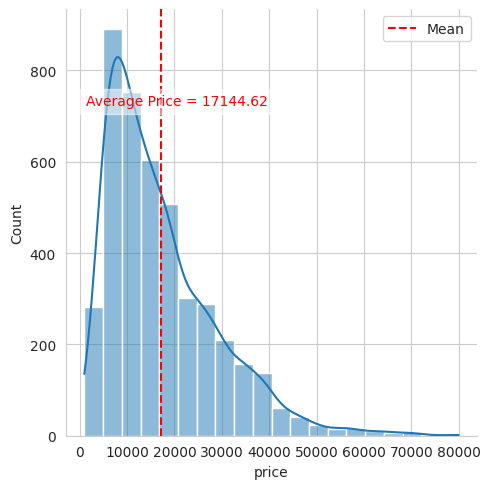

In [325]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))

plotd = sns.displot(df.price, kde=True, bins=20)

mean_line = plt.axvline(df.price.mean(), c='red', linestyle='dashed', label='Mean')

plt.text(0.49, 0.8, f'Average Price = {df.price.mean():.2f}', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white',alpha=0.5))
plt.legend()
plt.show()

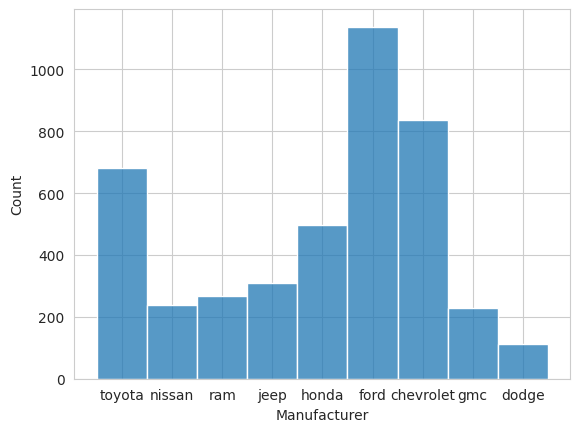

In [349]:
# prompt: create a histogram on manufacturer

ax = sns.histplot(data=df, x="manufacturer", bins=20)
# Capitalize the x-axis label
ax.set_xlabel(ax.get_xlabel().title())
plt.show()


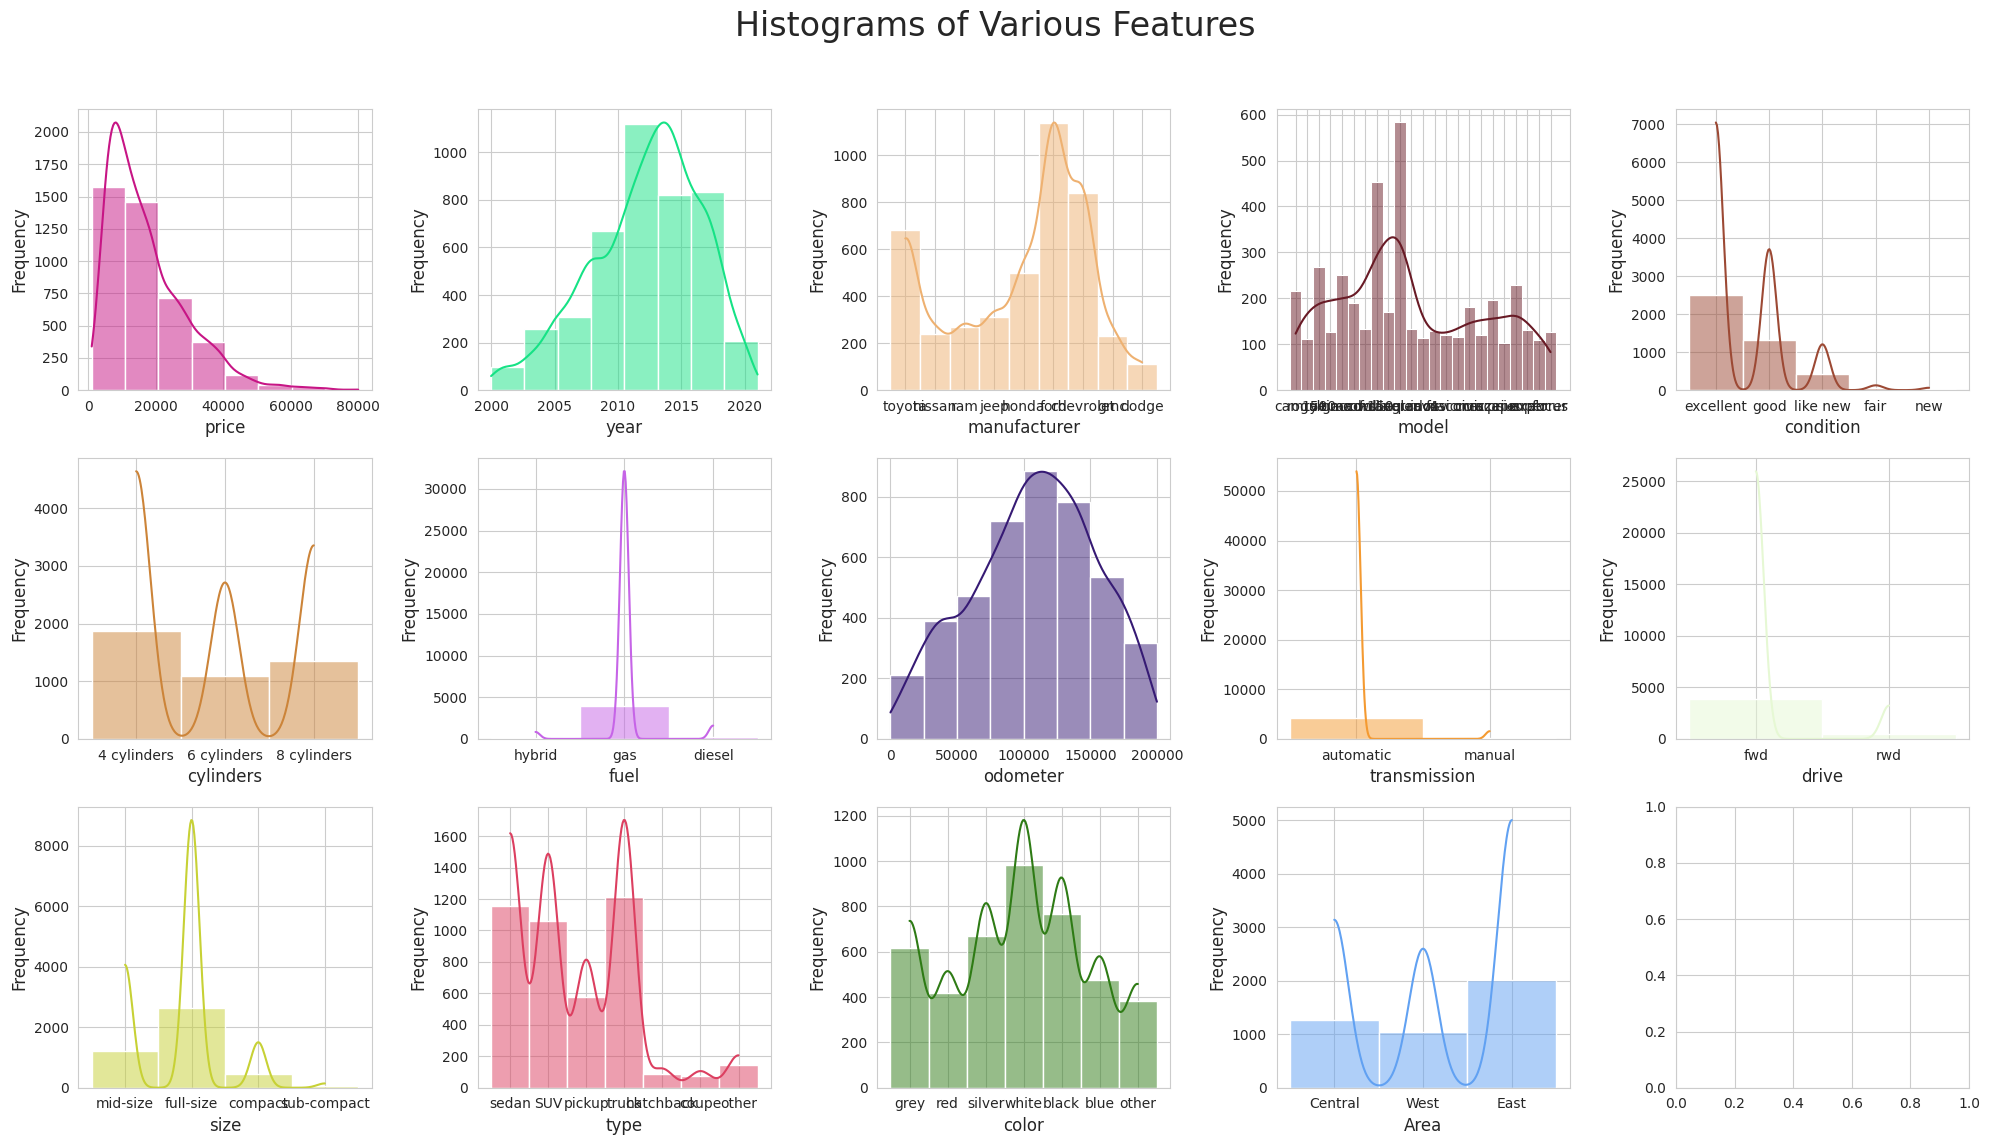

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

selected_cols = [col for col in df.columns ]

colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 5 + 1
num_cols = min(5, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograms of Various Features", size=24)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(df[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)  # Set x-axis label font size
            axes[i, j].set_ylabel("Frequency", fontsize=12)  # Set y-axis label font size

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

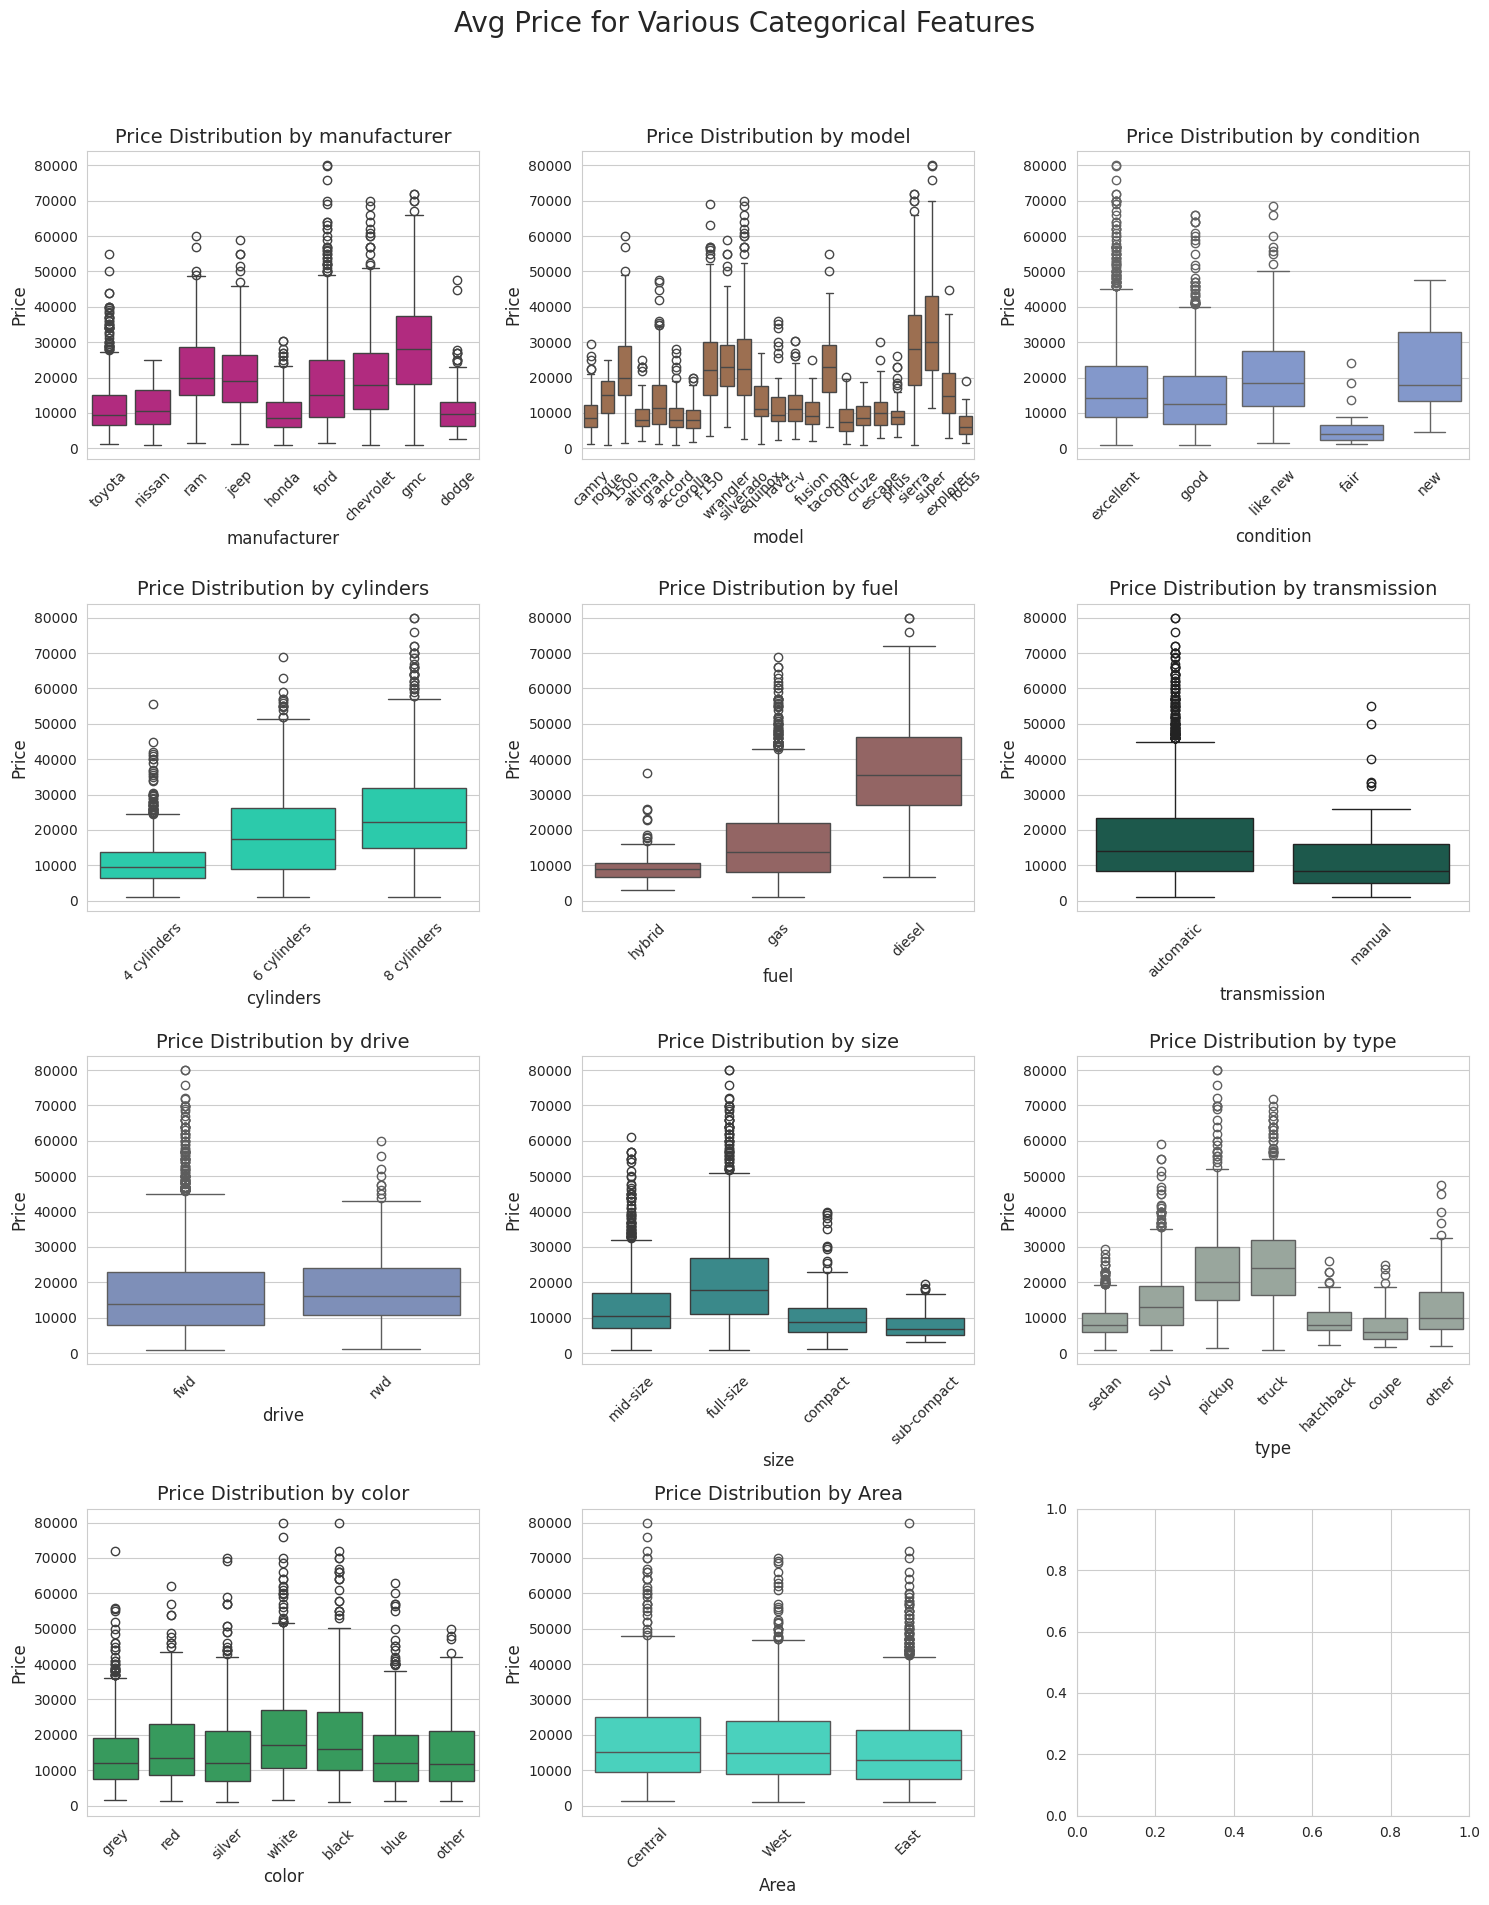

In [361]:
categorical_cols = df.select_dtypes(include=['object']).columns

selected_cols = [col for col in categorical_cols ]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Avg Price for Various Categorical Features", size=20)

colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            top_brands = df['manufacturer'].value_counts().nlargest(10).index
            filtered_df = df[df['manufacturer'].isin(top_brands)]

            sns.boxplot(x=selected_cols[idx], y='price', data=filtered_df, ax=axes[i, j], palette=[colors[idx]])
            axes[i, j].set_title(f'Price Distribution by {selected_cols[idx]}', fontsize=14)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)
            axes[i, j].set_ylabel("Price", fontsize=12)
            axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Figure(1500x500) [[<Axes: > <Axes: >]]
[(0.8965875379988408, 0.397878940389414, 0.48855601154737455), (0.3222105611243304, 0.6084935194285184, 0.5836420826504699)]

0 0 0 | 
0 1 1 | 


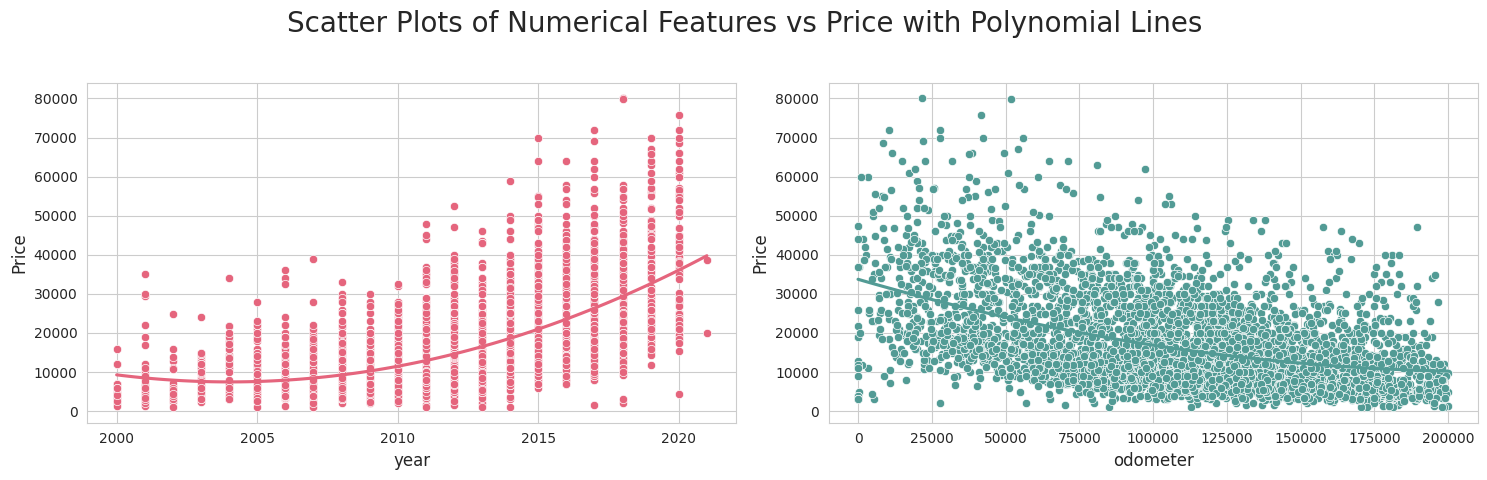

In [343]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

selected_cols = [col for col in numerical_cols if col not in ['price']]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
axes = axes.reshape(num_rows, num_cols)

fig.suptitle("Scatter Plots of Numerical Features vs Price with Polynomial Lines", size=20)

# Option
palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)


for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        print(i, j, idx, end=' | ')  # Prints i, j, k in the same line separated by ' | '
        print()  # Prints a newline after each innermost loop iteration
        if idx < num_subplots:
            sns.scatterplot(x=selected_cols[idx], y='price', data=df, ax=axes[i,j], color=palette[j])
            sns.regplot(x=selected_cols[idx], y='price', data=df, ax=axes[i,j], scatter=False, order=2, color=palette[idx], ci=None)

            axes[i,j].set_xlabel(selected_cols[idx].capitalize, fontsize=12)
            axes[i,j].set_ylabel("Price", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [362]:
mtr = df.corr()
mask = np.zeros_like(mtr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,9))
plt.title("Correlation Matrix in Heatmap", size=20)
sns.heatmap(mtr, mask= mask, annot=True, annot_kws={"size": 10});

ValueError: could not convert string to float: 'toyota'

In [304]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()

#--------------------------------------------------------------------------
numeric_feature = df.dtypes!=object
final_numeric_feature = df.columns[numeric_feature].tolist()

In [373]:
df_dummy = pd.get_dummies(df, prefix=final_categorical_feature, columns=final_categorical_feature, drop_first=True)


X = df_dummy.drop("price", axis = 1)
y = df_dummy['price']



In [314]:
# Find 'toyota' in any column
mask = df_dummy.applymap(lambda x: x == 'toyota').any(axis=1)

# Filter the DataFrame based on the condition
result = df_dummy[mask]

print(result)

Empty DataFrame
Columns: [price, year, odometer, manufacturer_dodge, manufacturer_ford, manufacturer_gmc, manufacturer_honda, manufacturer_jeep, manufacturer_nissan, manufacturer_ram, manufacturer_toyota, model_accord, model_altima, model_camry, model_civic, model_corolla, model_cr-v, model_cruze, model_equinox, model_escape, model_explorer, model_f-150, model_focus, model_fusion, model_grand, model_prius, model_rav4, model_rogue, model_sierra, model_silverado, model_super, model_tacoma, model_wrangler, condition_fair, condition_good, condition_like new, condition_new, cylinders_6 cylinders, cylinders_8 cylinders, fuel_gas, fuel_hybrid, transmission_manual, drive_rwd, size_full-size, size_mid-size, size_sub-compact, type_coupe, type_hatchback, type_other, type_pickup, type_sedan, type_truck, color_blue, color_grey, color_other, color_red, color_silver, color_white, Area_East, Area_West]
Index: []

[0 rows x 60 columns]


In [374]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [375]:
from sklearn.model_selection import train_test_split

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=100)

In [376]:
from sklearn.preprocessing import MinMaxScaler
# scale the target variable
scale_target = MinMaxScaler()
y_train = pd.DataFrame(y_train)
y_train = scale_target.fit_transform(y_train)
# -------------------------------------------------
y_test = pd.DataFrame(y_test)
y_test = scale_target.transform(y_test)

In [377]:
# Create a Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_lr)
print("R-squared :", r2_lr)

Mean Squared Error: 0.003981652347556694
R-squared : 0.8145921569133636


⏩ Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. In this case, the MSE is approximately 0.0040. Lower values of MSE indicate better model performance, as it means the model's predictions are closer to the actual values.

⏩ The R-squared value is approximately 0.8346, indicating that around 81.5% of the variance in the target variable is explained by the model. Higher values of R-squared suggest better model fit to the data.

In [378]:
# Polynomial regression of degree 2
model_degree_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_degree_2.fit(X_train, y_train)

# Polynomial regression of degree 3
model_degree_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_degree_3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [379]:
# Predictions
y_pred_degree_2 = model_degree_2.predict(X_test)
y_pred_degree_3 = model_degree_3.predict(X_test)

# Calculate mean squared error
mse_degree_2 = mean_squared_error(y_test, y_pred_degree_2)
mse_degree_3 = mean_squared_error(y_test, y_pred_degree_3)

# Calculate the R2 Score
r2_degree_2 = r2_score(y_test, y_pred_degree_2)
r2_degree_3 = r2_score(y_test, y_pred_degree_3)




print("MSE (degree 2):", mse_degree_2)
print("R-squared (degree 2):", r2_degree_2)
print('\n')


print("MSE (degree 3):", mse_degree_3)
print("R-squared (degree 3):", r2_degree_3)

print('\n')

MSE (degree 2): 8.917764468862956e+19
R-squared (degree 2): -4.152606332748093e+21


MSE (degree 3): 1.6110314917596303e+20
R-squared (degree 3): -7.501857218023881e+21




In [392]:

lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)

algo = [ridge,knn,lasso, lm, rf]

result = []
ml_model = []

for i in algo:
        start = time.process_time()
        ml_model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(round(time.process_time()-start,3)),"sec")

result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result

Ridge ✓     0.03 sec
KNeighborsRegressor ✓     0.97 sec
Lasso ✓     0.043 sec
LinearRegression ✓     0.052 sec
RandomForestRegressor ✓     3.23 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
RandomForestRegressor_baseline,0.982222,8.646379e-01,0.019729,0.053916,0.012797,0.034197
Ridge_baseline,0.829970,8.148916e-01,0.061012,0.063049,0.042949,0.043329
LinearRegression_baseline,0.830285,8.145922e-01,0.060956,0.063100,0.042935,0.043382
KNeighborsRegressor_baseline,0.760056,6.287119e-01,0.072478,0.089294,0.050235,0.062763
Lasso_baseline,0.000000,-4.109889e-07,0.147963,0.146544,0.114620,0.115479


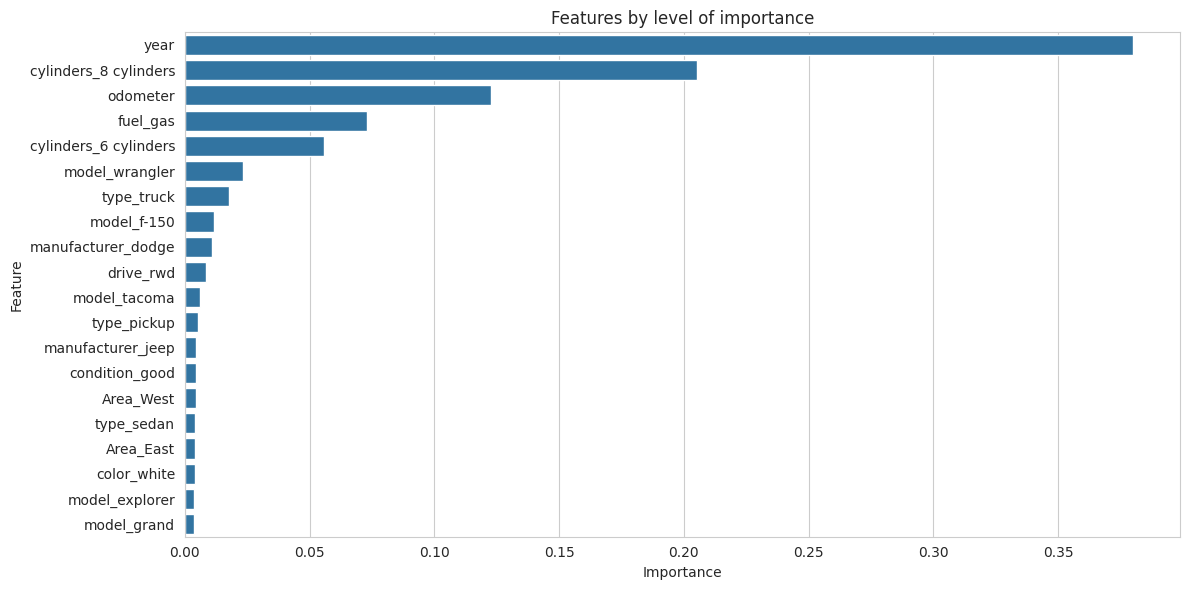

In [406]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)


plt.figure(figsize=(12,6))
sns.barplot(x="importance",
            y="variable",
            data=importance.head(20))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features by level of importance")
plt.tight_layout()

In [ ]:
# prompt: create pandas dataframe of X_train without the 'price' column



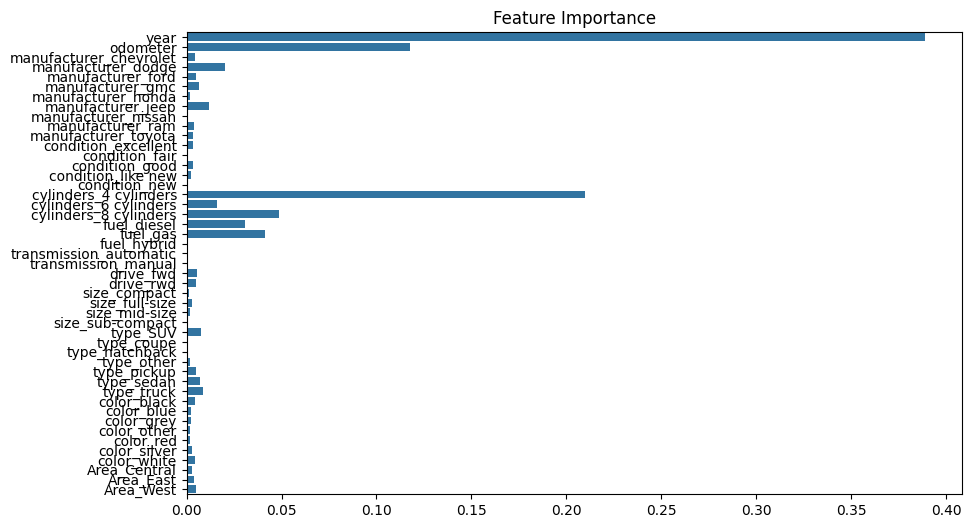

In [283]:

# Get feature importance
ohe = (clf.named_steps['preprocessor']
       .named_transformers_['cat']
       .get_feature_names_out(input_features=categorical_cols))
labels = np.concatenate([numerical_cols, ohe])
feature_importances = clf.named_steps['model'].feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=labels)
plt.title('Feature Importance')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
#  now normalize any of the columns in the remaining dataset

from sklearn.preprocessing import MinMaxScaler

# Normalize the 'odometer' column
scaler = MinMaxScaler()
df['odometer'] = scaler.fit_transform(df['odometer'].values.reshape(-1, 1))

# Normalize the 'price' column
df['price'] = scaler.fit_transform(df['price'].values.reshape(-1, 1))


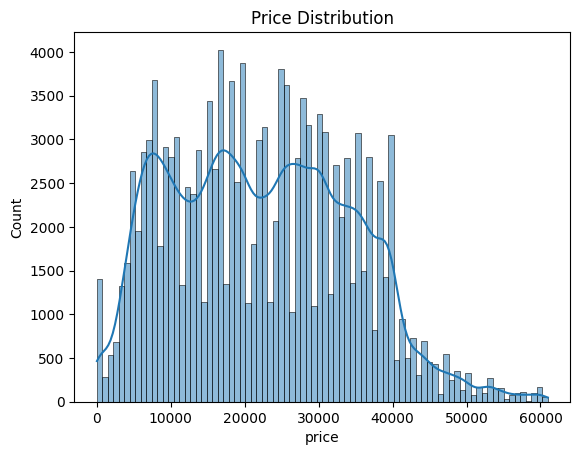

In [ ]:
# Price distribution
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()



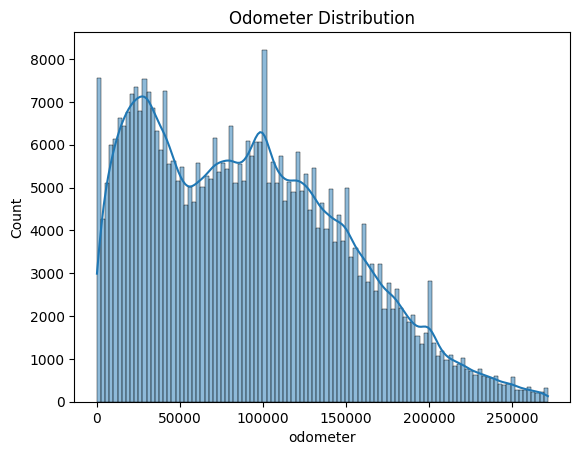

In [ ]:
#  draw histogram of odometer bins

# Odometer distribution
sns.histplot(df['odometer'], kde=True)
plt.title('Odometer Distribution')
plt.show()


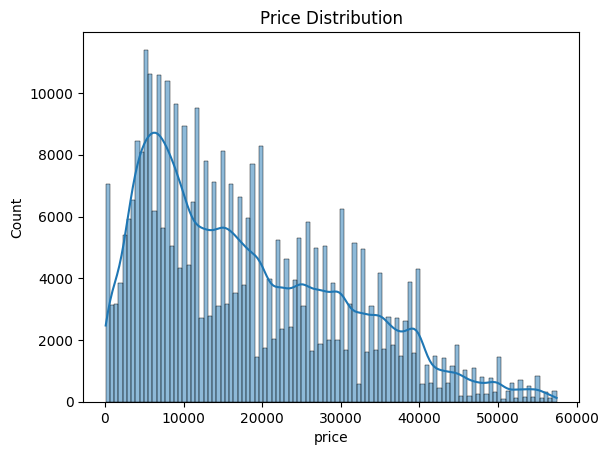

In [ ]:
#  create a histogram of price

sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()


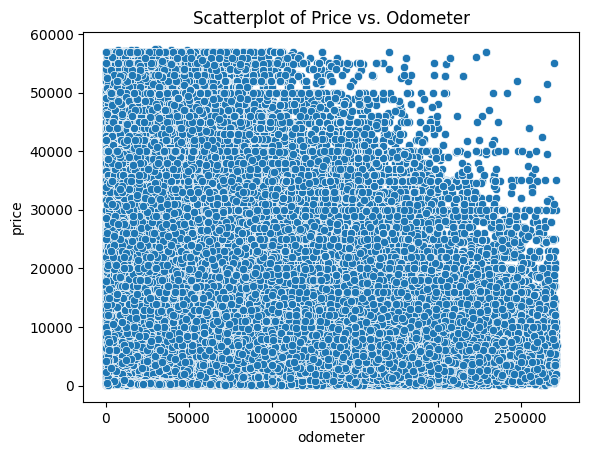

In [ ]:
#  create a scatterplot of price vs odometer

sns.scatterplot(data=df, x="odometer", y="price")
plt.title("Scatterplot of Price vs. Odometer")
plt.show()


Area
East       173471
West       110494
Central     87078
Name: count, dtype: int64

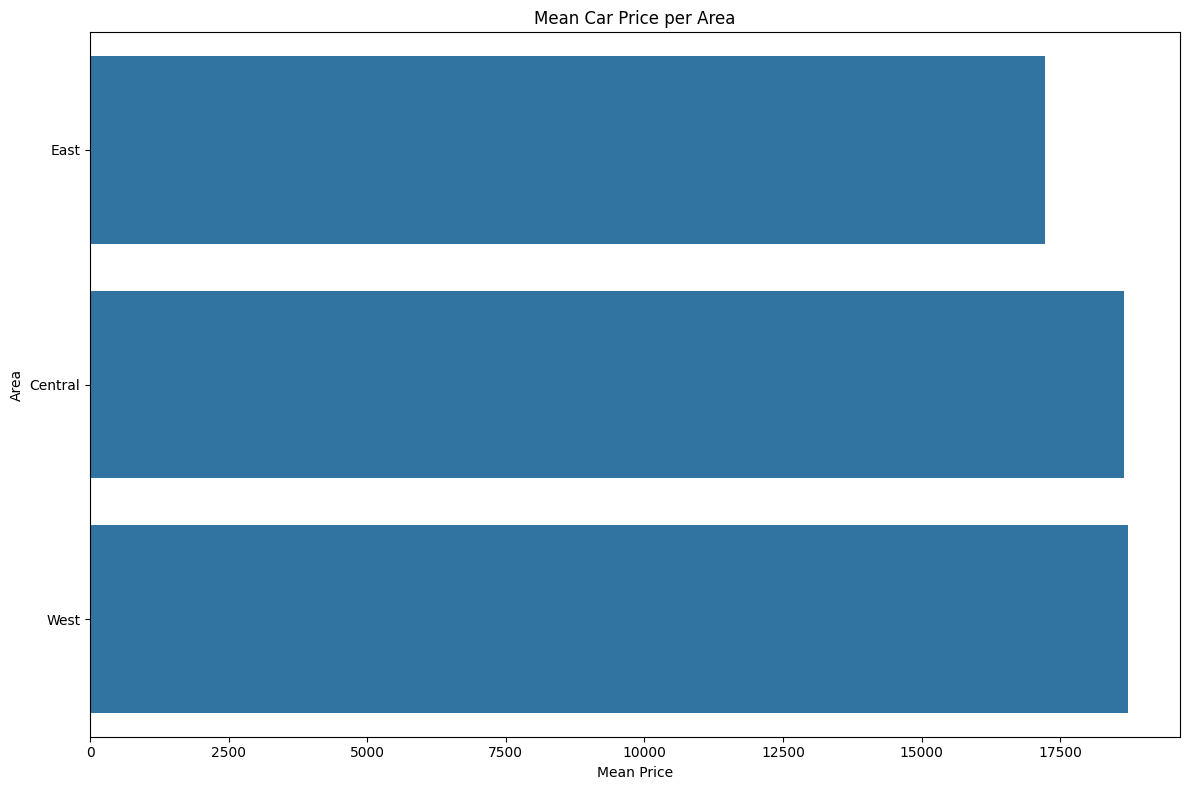

In [ ]:
# Calculate the mean price per area
mean_price_per_state = df.groupby('Area')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=mean_price_per_state.values, y=mean_price_per_state.index)
plt.title('Mean Car Price per Area')
plt.xlabel('Mean Price')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

In [ ]:
#  save current state of df into temporary file and reload it.

#df.to_pickle("/content/drive/MyDrive/UC Berkeley/data/temp.pkl")
df = pd.read_pickle("/content/drive/MyDrive/UC Berkeley/data/temp.pkl")

In [ ]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'auburn'

In [ ]:

X = df.drop('price', axis=1)
y = df['price']

# Using RFE for feature selection
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Print selected features
selected_features = X.columns[fit.support_]
print('Selected Features:', selected_features)

ValueError: could not convert string to float: 'auburn'

In [ ]:
#  save current state of df into temporary file and reload it.

df.to_pickle("/content/drive/MyDrive/UC Berkeley/data/temp.pkl")
df = pd.read_pickle("/content/drive/MyDrive/UC Berkeley/data/temp.pkl")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.